In [61]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [68]:
nfl_elo_df = pd.read_csv('nfl_elo.csv')
columns_to_drop = [
    'qb1_value_pre', 'qb2_value_pre', 'qb1_adj', 'qb2_adj',
    'elo1_post', 'elo2_post', 'qb1_game_value', 'qb2_game_value',
    'qb1_value_post', 'qb2_value_post', 'qbelo1_post', 'qbelo2_post'
]
nfl_elo_df = nfl_elo_df.drop(columns=columns_to_drop)
nfl_elo_df['date'] = pd.to_datetime(nfl_elo_df['date'])
nfl_elo_df['winner'] = np.where(nfl_elo_df['score1'] > nfl_elo_df['score2'], nfl_elo_df['team1'], nfl_elo_df['team2'])
nfl_elo_df = nfl_elo_df[nfl_elo_df['date'].dt.year >= 1970]
nfl_elo_df = nfl_elo_df[(nfl_elo_df['date'].dt.month >= 9) | (nfl_elo_df['date'].dt.month <= 2)]
nfl_elo_df['favored_team'] = np.where(nfl_elo_df['elo_prob1'] > nfl_elo_df['elo_prob2'], nfl_elo_df['team1'], nfl_elo_df['team2'])
nfl_elo_df['favored_team_won'] = np.where(nfl_elo_df['favored_team'] == nfl_elo_df['winner'], 'Won', 'Lost')
nfl_elo_df['favored_qb'] = np.where(nfl_elo_df['qbelo_prob1'] > nfl_elo_df['qbelo_prob2'], nfl_elo_df['team1'], nfl_elo_df['team2'])
nfl_elo_df['favored_qb_won'] = np.where(nfl_elo_df['favored_team'] == nfl_elo_df['winner'], 'Won', 'Lost')
nfl_elo_df['team_elo_difference'] = abs(nfl_elo_df['elo1_pre'] - nfl_elo_df['elo2_pre'])
nfl_elo_df['qb_elo_difference'] = abs(nfl_elo_df['qbelo1_pre'] - nfl_elo_df['qbelo2_pre'])
nfl_elo_df['team_elo_difference_bins'] = pd.cut(nfl_elo_df['team_elo_difference'], bins=3, labels=['Low', 'Medium', 'High'])
nfl_elo_df['qb_elo_difference_bins'] = pd.cut(nfl_elo_df['qb_elo_difference'], bins=3, labels=['Low', 'Medium', 'High'])

Now we test the correlation between a higher elo prior to the start of the game and then the outcome of the game. The null hypothesis is a lack of correlation while the alternative hypothesis is that there is a relationship between the winners elo and the favored team winning. This will help us understand if the winning teams elo 

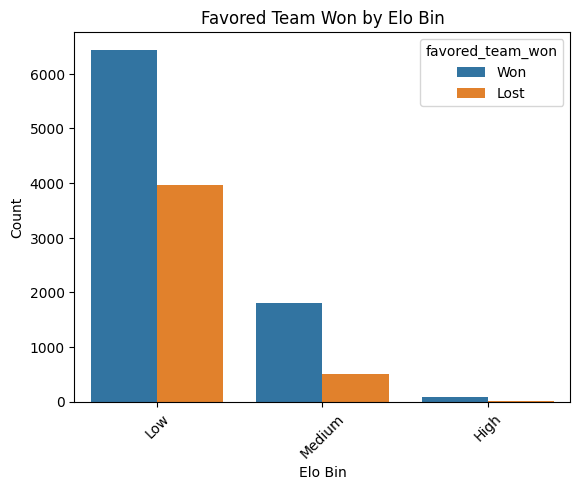

In [72]:
sns.countplot(x='team_elo_difference_bins', hue='favored_team_won', data=nfl_elo_df)

plt.title('Favored Team Won by Elo Bin')
plt.xlabel('Elo Bin')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [73]:
contingency_table_season = pd.crosstab(nfl_elo_df['team_elo_difference_bins'], nfl_elo_df['favored_team_won'])
contingency_table_season
chi2 = stats.chi2_contingency(contingency_table_season)
print(f"P-Value: {chi2.pvalue}")


P-Value: 2.6945798333799463e-52


And now we extend the same ideas to the qb elos to determine if there's a correlation between a team winning based on their qb's elo. Null hypothesis relates to no relation while an alternative hypothesis states there is a correlation.

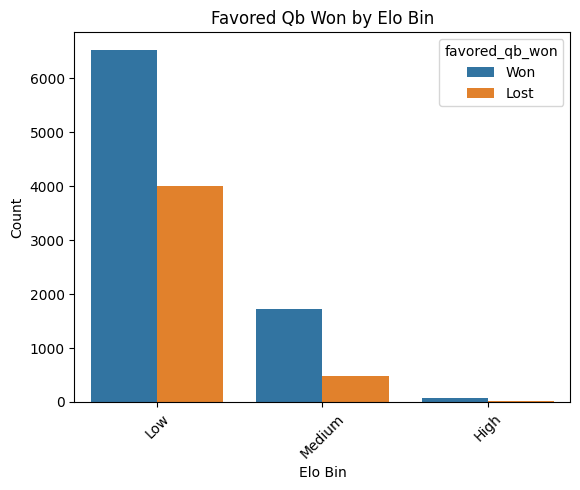

In [74]:
sns.countplot(x='qb_elo_difference_bins', hue='favored_qb_won', data=nfl_elo_df)

plt.title('Favored Qb Won by Elo Bin')
plt.xlabel('Elo Bin')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=10)
plt.show()

In [75]:
contingency_table_playoff = pd.crosstab(nfl_elo_df['qb_elo_difference_bins'], nfl_elo_df['favored_qb_won'])
contingency_table_playoff
chi2 = stats.chi2_contingency(contingency_table_playoff)
print(f"P-Value: {chi2.pvalue}")

P-Value: 5.6393213619230115e-52
